[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

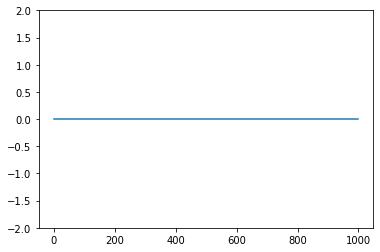

In [12]:
import pyrosim
import matplotlib.pyplot as plt
#sim = pyrosim.Simulator()
sim = pyrosim.Simulator( play_paused=True , eval_time=1000 )
#sim.send_cylinder( x=0 , y=0 , z=0.6 , length=1.0 , radius=0.1 )
whiteObject = sim.send_cylinder( x=0 , y=0 , z=0.6 , length=1.0, radius=0.1 )
redObject = sim.send_cylinder( x=0.0 , y= 0.5 , z=1.1 , r1=0 , r2=1, r3=0 , r=1, g=0, b=0 )
joint = sim.send_hinge_joint( first_body_id = whiteObject , second_body_id = redObject , x=0 , y=0, z=1.0 , n1 = -1 , n2 = 0 , n3 = 0 ,lo=-3.14159/2 , hi=3.14159/2  )

#sensors
T0 = sim.send_touch_sensor( body_id = whiteObject )
T1 = sim.send_touch_sensor( body_id = redObject )
P2 = sim.send_proprioceptive_sensor( joint_id = joint )
#redの先端にセンサー
R3 = sim.send_ray_sensor( body_id = redObject , x = 0 , y = 1.1 , z = 1.1 , r1 = 0 , r2 = 1, r3 = 0)

#neurons
SN0 = sim.send_sensor_neuron( sensor_id = T0 )
SN1 = sim.send_sensor_neuron( sensor_id = T1 )
MN2 = sim.send_motor_neuron( joint_id = joint )

#synspses
sim.send_synapse(source_neuron_id = SN1 , target_neuron_id = MN2 , weight = -1.0 )

sim.start()
sim.wait_to_finish()

sensorData = sim.get_sensor_data( sensor_id = P2 )
print(sensorData)


f = plt.figure()
panel = f.add_subplot(111)
plt.plot(sensorData)
panel.set_ylim(-2,+2)
plt.show()